In [21]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Correlation

In [22]:
df = pd.read_csv('./train.csv')
df.head()

,ID,target,v1,v2,v3,v4,v5,v6,v7,v8,...,v122,v123,v124,v125,v126,v127,v128,v129,v130,v131
0,3,1,1.335739,8.727474,C,3.921026,7.915266,2.599278,3.176895,0.012941,...,8.000000,1.989780,0.035754,AU,1.804126,3.113719,2.024285,0,0.636365,2.857144
1,4,1,NaN,NaN,C,NaN,9.191265,NaN,NaN,2.301630,...,NaN,NaN,0.598896,AF,NaN,NaN,1.957825,0,NaN,NaN
2,5,1,0.943877,5.310079,C,4.410969,5.326159,3.979592,3.928571,0.019645,...,9.333333,2.477596,0.013452,AE,1.773709,3.922193,1.120468,2,0.883118,1.176472
3,6,1,0.797415,8.304757,C,4.225930,11.627438,2.097700,1.987549,0.171947,...,7.018256,1.812795,0.002267,CJ,1.415230,2.954381,1.990847,1,1.677108,1.034483
4,8,1,NaN,NaN,C,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,Z,NaN,NaN,NaN,0,NaN,NaN


In [23]:
df.shape

(114321, 133)

In [24]:
numerics = ['int16', 'int32','int64', 'float16', 'float32', 'float64']
numerical_features = list(df.select_dtypes(include=numerics).columns)

In [25]:
data = df[numerical_features]

In [26]:
test_data = data[['v1', 'v2', 'v4']]

<Axes: >

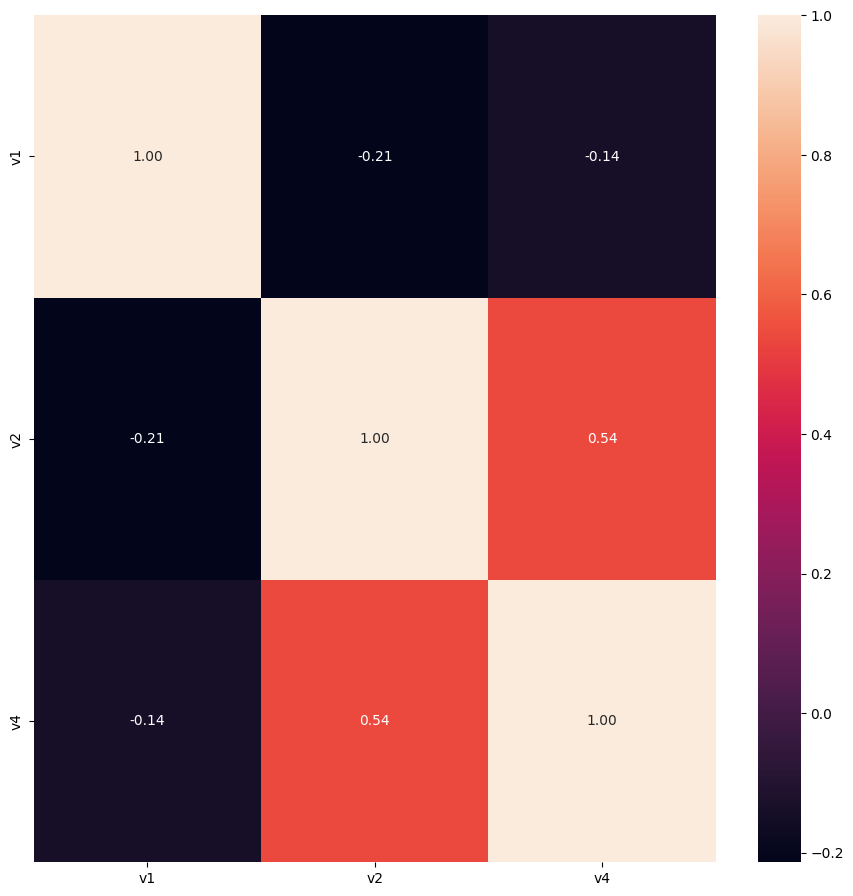

In [27]:
corr = test_data.corr()
fig, ax = plt.subplots()
fig.set_size_inches(11,11)
sns.heatmap(corr, annot=True, fmt=".2f")

In [28]:
data.shape

(114321, 114)

<Axes: >

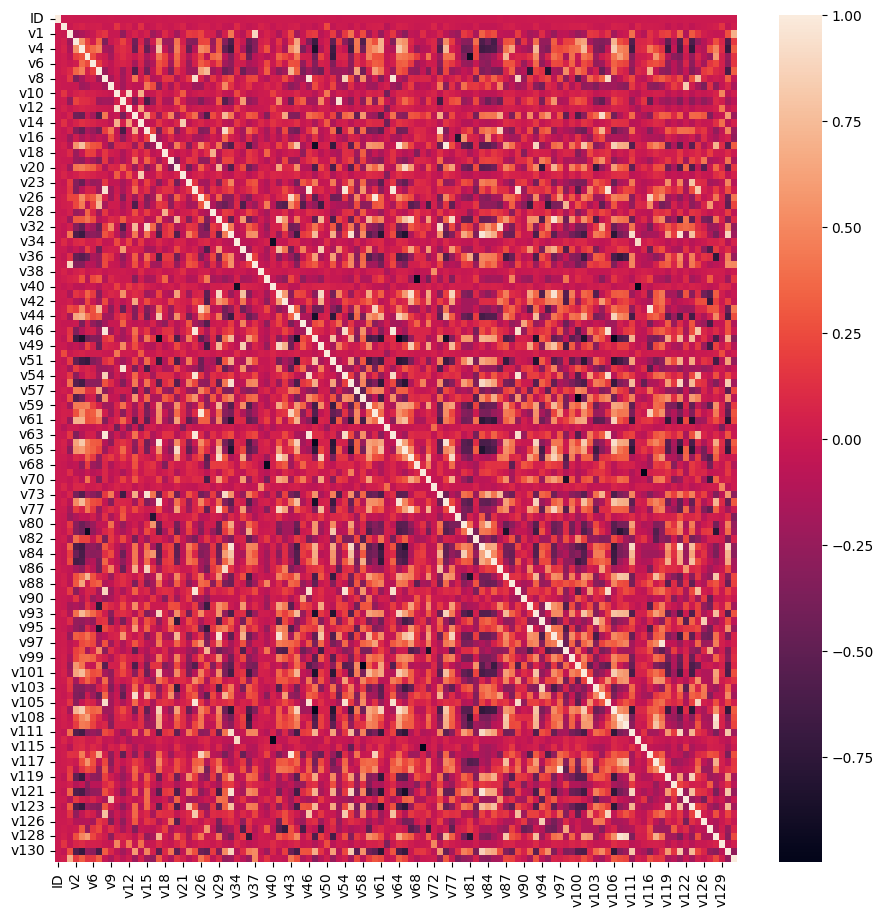

In [29]:
corr = data.corr()
fig, ax = plt.subplots()
fig.set_size_inches(11,11)
sns.heatmap(corr)

In [30]:
def correlation(data, threshold=None):
    # Set of all names of correlated columns
    col_corr = set()
    corr_mat = data.corr()
    for i in range(len(corr_mat.columns)):
        for j in range(i):
            if (abs(corr_mat.iloc[i,j]) > threshold):
                colname = corr_mat.columns[i]
                col_corr.add(colname)
    return col_corr

In [31]:
correlated_features = correlation(data=data, threshold=0.8)
len(set(correlated_features))

55

In [ ]:
data.drop(labels=correlated_features, axis=1, inplace=True)